### Unsupervised Learning - Fraud Detection Transactions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import uniform, randint
from scipy.stats import mode
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Loading and importing the dataset
data = pd.read_csv('dataset1.csv', sep = ',')
X = data.iloc[:, :-1].values  # All columns except the last as features
Y = data.iloc[:, -1].values # Last column as target
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,USER_2510,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [ ]:
data.describe (include = 'all')

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
count,50000,50000,50000.000000,50000,50000,50000.000000,50000,50000,50000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,50000,8963,NaN,4,47724,NaN,3,5,5,NaN,...,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,TXN_5311,USER_6599,NaN,POS,2023-06-04 06:35:00,NaN,Tablet,Tokyo,Clothing,NaN,...,NaN,NaN,NaN,Mastercard,NaN,NaN,Biometric,NaN,NaN,NaN
freq,1,16,NaN,12549,4,NaN,16779,10208,10033,NaN,...,NaN,NaN,NaN,12693,NaN,NaN,12591,NaN,NaN,NaN
mean,NaN,NaN,99.411012,NaN,NaN,50294.065981,NaN,NaN,NaN,0.05020,...,7.485240,255.271924,2.003540,NaN,119.999940,2499.164155,NaN,0.501556,0.299640,0.321340
std,NaN,NaN,98.687292,NaN,NaN,28760.458557,NaN,NaN,NaN,0.21836,...,4.039637,141.382279,1.414273,NaN,68.985817,1442.013834,NaN,0.287774,0.458105,0.466996
min,NaN,NaN,0.000000,NaN,NaN,500.480000,NaN,NaN,NaN,0.00000,...,1.000000,10.000000,0.000000,NaN,1.000000,0.250000,NaN,0.000100,0.000000,0.000000
25%,NaN,NaN,28.677500,NaN,NaN,25355.995000,NaN,NaN,NaN,0.00000,...,4.000000,132.087500,1.000000,NaN,60.000000,1256.497500,NaN,0.254000,0.000000,0.000000
50%,NaN,NaN,69.660000,NaN,NaN,50384.430000,NaN,NaN,NaN,0.00000,...,7.000000,256.085000,2.000000,NaN,120.000000,2490.785000,NaN,0.502250,0.000000,0.000000
75%,NaN,NaN,138.852500,NaN,NaN,75115.135000,NaN,NaN,NaN,0.00000,...,11.000000,378.032500,3.000000,NaN,180.000000,3746.395000,NaN,0.749525,1.000000,1.000000


### Non-Fraud vs Fraud Transactions

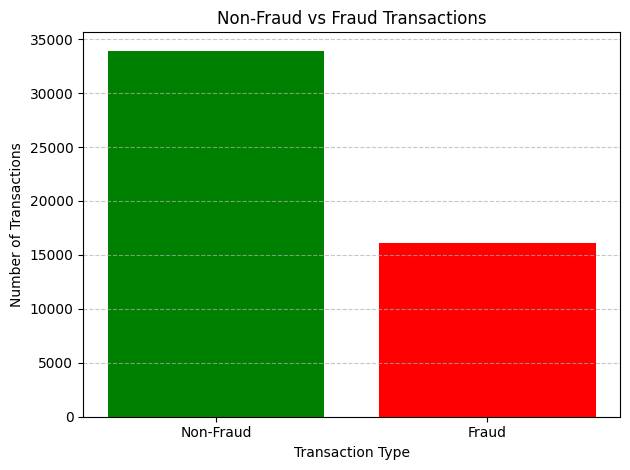

In [ ]:
# Counting non-fraud and fraud transactions
fraud_counting = data['Fraud_Label'].value_counts().sort_index()

# Plotting the graph
plt.bar(['Non-Fraud', 'Fraud'], fraud_counting, color = ['green' , 'red'])
plt.title('Non-Fraud vs Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.show()

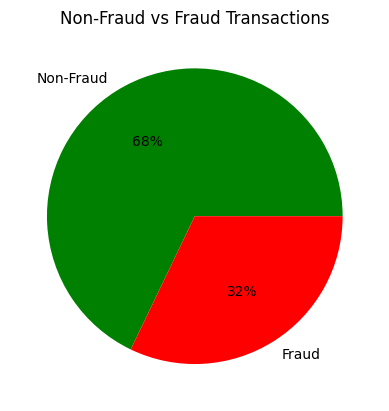

In [ ]:
plt.pie(data.Fraud_Label.value_counts(),labels = ['Non-Fraud', 'Fraud'], autopct = '%.f%%', colors = ['green', 'red'])
plt.title('Non-Fraud vs Fraud Transactions')
plt.show()

### Fraud Transactions Features

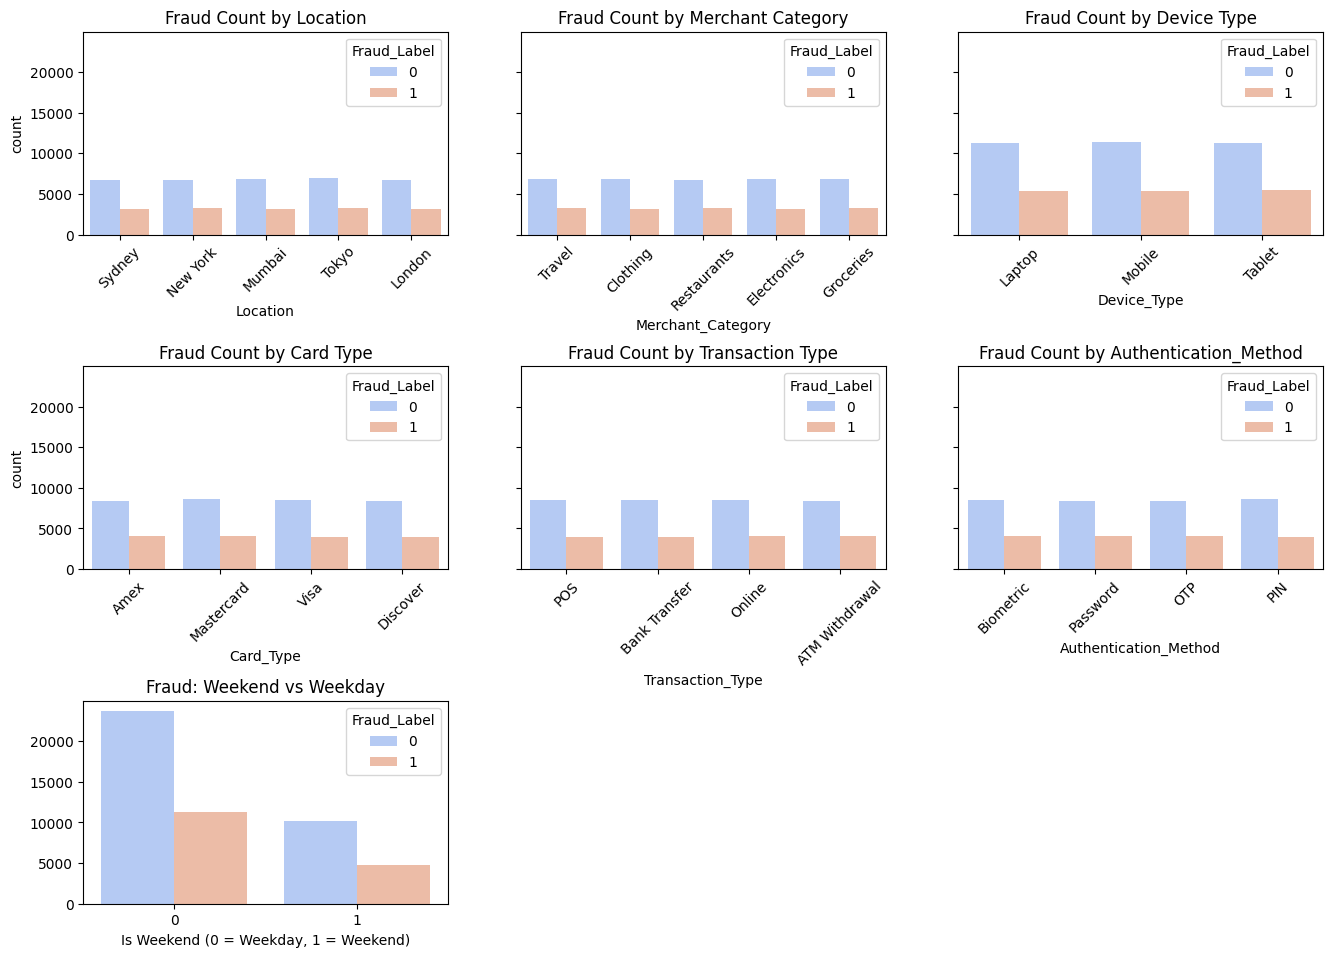

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (16,8), sharey = True, constrained_layout = False)
axs = axes.ravel ()

sns.countplot(ax = axs [0], x = 'Location', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[0].set_title("Fraud Count by Location")
axs[0].tick_params(axis ='x', rotation = 45)

sns.countplot(ax = axs[1], x = 'Merchant_Category', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[1].set_title("Fraud Count by Merchant Category")
axs[1].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[2], x = 'Device_Type', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[2].set_title("Fraud Count by Device Type")
axs[2].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[3], x = 'Card_Type', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[3].set_title("Fraud Count by Card Type")
axs[3].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[4], x = 'Transaction_Type', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[4].set_title("Fraud Count by Transaction Type")
axs[4].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[5], x = 'Authentication_Method', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[5].set_title("Fraud Count by Authentication_Method")
axs[5].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[6], x = 'Is_Weekend', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[6].set_title("Fraud: Weekend vs Weekday")
axs[6].set_xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
axs[6].set_ylabel("")

for ax in axs[7:]:
    ax.remove()
plt.subplots_adjust(wspace = 0.2, hspace = 0.65, top = 1.2)
plt.show()

In [ ]:
# Step 1 - Data Cleaning

# Check for null/missing values
data.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Timestamp,0
Account_Balance,0
Device_Type,0
Location,0
Merchant_Category,0
IP_Address_Flag,0


In [ ]:
# Converting 'Timestamp' to datetime
data ['Timestamp'] = pd.to_datetime (data['Timestamp'])
data ['Timestamp']

,Timestamp
0,2023-08-14 19:30:00
1,2023-06-07 04:01:00
2,2023-06-20 15:25:00
3,2023-12-07 00:31:00
4,2023-11-11 23:44:00
...,...
49995,2023-01-29 18:38:00
49996,2023-05-09 08:55:00
49997,2023-01-30 19:32:00
49998,2023-03-09 19:47:00


In [ ]:
# Step 2 - Data Preprocessing
data = data.drop(columns = ['Transaction_ID', 'User_ID', 'Timestamp', 'Risk_Score', 'Previous_Fraudulent_Activity'], errors = 'ignore')
data

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,7,437.63,3,Amex,65,883.17,Biometric,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,13,478.76,4,Mastercard,186,2203.36,Password,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,14,50.01,4,Visa,226,1909.29,Biometric,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,8,182.48,4,Visa,76,1311.86,OTP,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,14,328.69,4,Mastercard,140,966.98,Password,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0,2,389.00,3,Amex,98,1537.54,PIN,1,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0,13,434.95,4,Visa,93,2555.72,Biometric,0,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,0,1,369.15,2,Visa,114,4686.59,Biometric,0,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0,13,242.29,4,Discover,72,4886.92,Biometric,0,1


In [ ]:
# Step 2 - Data Preprocessing

# Encode categorical variables using Label Encoding for simplicity
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('Fraud_Label')
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
categorical_columns = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']
data_encoded_categ = pd.get_dummies (data, columns = categorical_columns, drop_first = True) # converting categorical features into dummy variables
data_encoded_categ

,Transaction_Amount,Account_Balance,IP_Address_Flag,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Is_Weekend,Fraud_Label,...,Merchant_Category_-0.7064250075416338,Merchant_Category_0.00024026619306980414,Merchant_Category_0.7069055399277734,Merchant_Category_1.413570813662477,Card_Type_-0.45442568530608535,Card_Type_0.44032442358988466,Card_Type_1.3350745324858546,Authentication_Method_-0.4452445109141687,Authentication_Method_0.44849773268085447,Authentication_Method_1.3422399762758777
0,-0.604147,1.492310,-0.229898,-0.120121,1.289836,0.704581,-0.797272,-1.120662,-0.654093,0,...,False,False,False,True,False,False,False,False,False,False
1,-0.995285,0.884250,-0.229898,1.365176,1.580752,1.411665,0.956729,-0.205135,-0.654093,1,...,False,False,False,False,False,True,False,False,False,True
2,-0.713888,-1.693492,-0.229898,1.612725,-1.451837,1.411665,1.536564,-0.409067,-0.654093,1,...,False,False,True,False,False,False,True,False,False,False
3,1.569711,0.921870,-0.229898,0.127429,-0.514864,1.411665,-0.637818,-0.823374,-0.654093,1,...,False,False,False,False,False,False,True,True,False,False
4,-0.690380,1.462460,-0.229898,1.612725,0.519293,1.411665,0.289918,-1.062541,1.528836,1,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.550847,0.927187,-0.229898,-1.357868,0.945871,0.704581,-0.318908,-0.666869,1.528836,0,...,False,False,False,False,False,False,False,False,True,False
49996,0.270949,-0.747642,-0.229898,1.365176,1.270880,1.411665,-0.391388,0.039220,-0.654093,1,...,False,False,False,False,False,False,True,False,False,False
49997,-0.277556,-0.708537,-0.229898,-1.605418,0.805470,-0.002503,-0.086974,1.516939,-0.654093,0,...,False,False,False,False,False,False,True,False,False,False
49998,-0.349805,0.612013,-0.229898,1.365176,-0.091822,1.411665,-0.695801,1.655865,-0.654093,1,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
# Defining the features (X) and target variable (y)
X = data.drop(columns = ["Fraud_Label"])  # Independent variables
y = data["Fraud_Label"]  # Target variable

from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
# Scaling training data and transforming test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Feature scaling applied.")

Feature scaling applied.


In [ ]:
# Check the size of the datasets
X_train.shape

(40000, 15)

In [ ]:
# Check the size of the datasets
X_test.shape

(10000, 15)

###Unsupervised Learning

### K-means Clustering

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fitting the K-Means
kmeans_model = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
kmeans_model.fit(X_test_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
# Predicting on test data
cluster_labels = kmeans_model.predict(X_test_scaled)

In [ ]:
# Map predicted cluster labels to class labels while using majority vote
cluster_labels = kmeans_model.labels_
mapped_labels = np.zeros_like(cluster_labels)

for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster
    majority_class = mode(y_test[mask], keepdims = True).mode[0]
    mapped_labels[mask] = majority_class

In [ ]:
cluster_labels = kmeans_model.labels_
fraud_ratios = []

# Calculating the fraud ratio for each cluster
for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster
    fraud_ratio = np.mean(y_test[mask])  # mean of 1s = % fraud
    fraud_ratios.append(fraud_ratio)

# Assigning 1 (fraud) to the cluster with the higher fraud ratio
fraud_cluster = np.argmax(fraud_ratios)
mapped_labels = np.where(cluster_labels == fraud_cluster, 1, 0)

In [ ]:
# Evaluating the model
print("The K-means Clustering Classification Report:")
print("Accuracy:", accuracy_score(y_test, mapped_labels))
print(classification_report(y_test, mapped_labels, zero_division = 0))

The K-means Clustering Classification Report:
Accuracy: 0.5765
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      6787
           1       0.33      0.31      0.32      3213

    accuracy                           0.58     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.57      0.58      0.57     10000



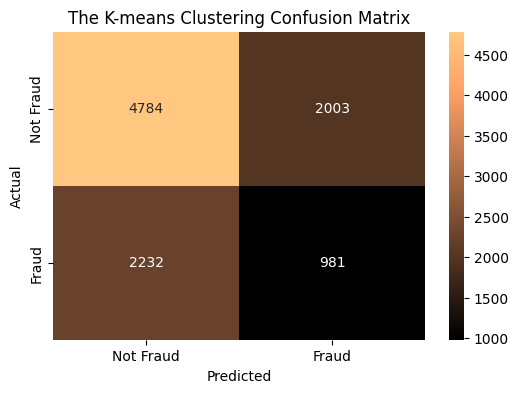

In [ ]:
# Plotting the K-means clustering confusion matrix
cm_kmeans = confusion_matrix(y_test, mapped_labels)
plt.figure(figsize = (6,4))
sns.heatmap(cm_kmeans, annot = True, fmt ='d', cmap = 'copper', xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'])
plt.title("The K-means Clustering Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

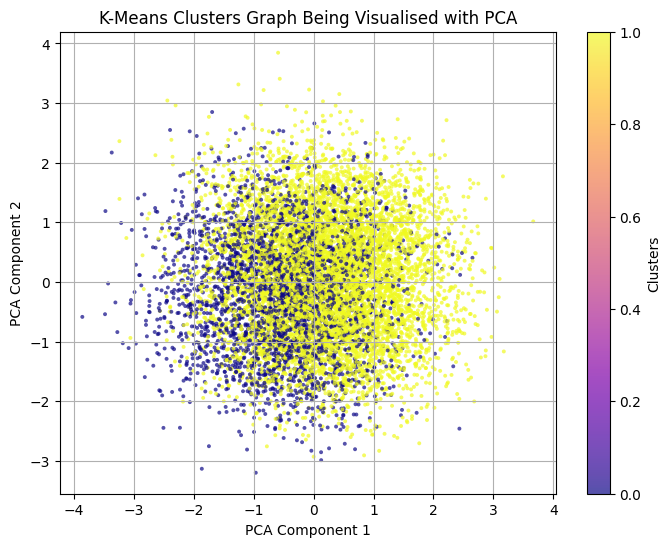

In [ ]:
# Applying Principal Component Analysis (PCA) to decrease it to a two dimension

pca = PCA(n_components = 2)
X_test_2D = pca.fit_transform(X_test_scaled)

# Predicting the clusters with KMeans
cluster_labels = kmeans_model.predict(X_test_scaled)

# Plotting the clusters
plt.figure(figsize = (8, 6))
scatter = plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c = cluster_labels, cmap = 'plasma', s = 8, linewidths = 0, edgecolors = 'none',  alpha = 0.7)
plt.title("K-Means Clusters Graph Being Visualised with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label = "Clusters")
plt.grid(True)
plt.show()

### K-means Elbow Curve

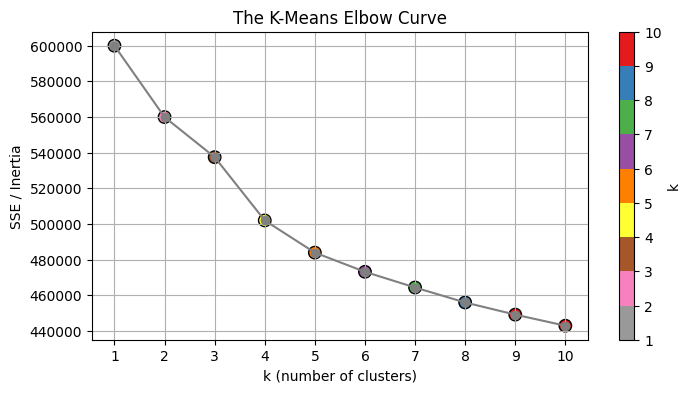

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Using the training set, so that it does not fall back to test set
X_elbow = X_train_scaled if 'X_train_scaled' in globals() else X_test_scaled

# Elbow (SSE/Inertia)
ks = range(1, 11)   # k could be any number but those were the best ones
inertias = [] # hold the Sum of Squared Errors (SSE) which is also Inertia
for k in ks:
    km = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, random_state = 42)
    km.fit(X_elbow)
    inertias.append(km.inertia_)   # sum of squared distances to the nearest centroid


plt.figure(figsize = (8, 4))
plt.plot(ks, inertias, marker = 'o', color = '0.5')
plt.scatter (ks, inertias, c = ks, cmap = 'Set1_r', s = 80, edgecolor = 'k')
plt.xticks(ks)
plt.colorbar(label = 'k')
plt.xlabel('k (number of clusters)')
plt.ylabel('SSE / Inertia')
plt.title('The K-Means Elbow Curve')
plt.grid(True)
plt.show()

### Hierarchical Clustering

In [ ]:
X_sample, _, y_sample, _ = train_test_split(
    X, y, stratify = y, train_size = 5000, random_state = 42
)

In [ ]:
pca = PCA(n_components = 10, random_state = 42)
X_reduced = pca.fit_transform(X_sample)

# n_components = 10: reduces data to 10 principal components

In [ ]:
# Fit the Hierarchical Clustering
hie_model = AgglomerativeClustering(
    n_clusters = 2,
    metric = 'euclidean', # distance metric to compute similarity between points
    linkage = 'ward') # merges clusters

In [ ]:
# Fitting and Predicting the model
cluster_labels1 = hie_model.fit_predict(X_test)

In [ ]:
# Map cluster labels to fraud/non-fraud using majority vote
mapped_labels1 = np.zeros_like(cluster_labels1)
for cluster in np.unique(cluster_labels1):
    mask = cluster_labels1 == cluster
    majority_class1 = np.bincount(y_test[mask]).argmax()
    mapped_labels1[mask] = majority_class1

In [ ]:
# Evaluating the model
print("The Hierarchical Clustering Classification Report:")
print("Accuracy:", accuracy_score(y_test, mapped_labels1))
print(classification_report(y_test, mapped_labels1))

The Hierarchical Clustering Classification Report:
Accuracy: 0.6787
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      6787
           1       0.00      0.00      0.00      3213

    accuracy                           0.68     10000
   macro avg       0.34      0.50      0.40     10000
weighted avg       0.46      0.68      0.55     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


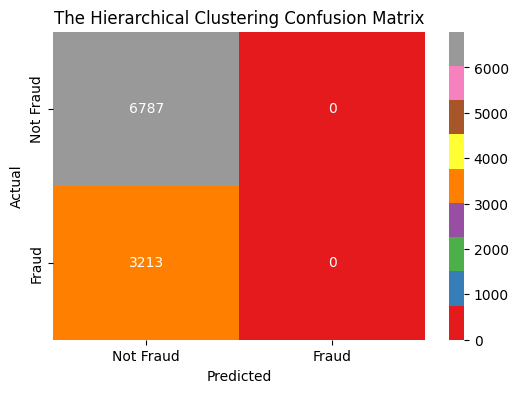

In [ ]:
# Plotting the Hierachical clustering confusion matrix
cm_hierclust = confusion_matrix(y_test, mapped_labels1)
plt.figure(figsize = (6,4))
sns.heatmap(cm_hierclust, annot = True, fmt ='d', cmap = 'Set1', xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'])
plt.title("The Hierarchical Clustering Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

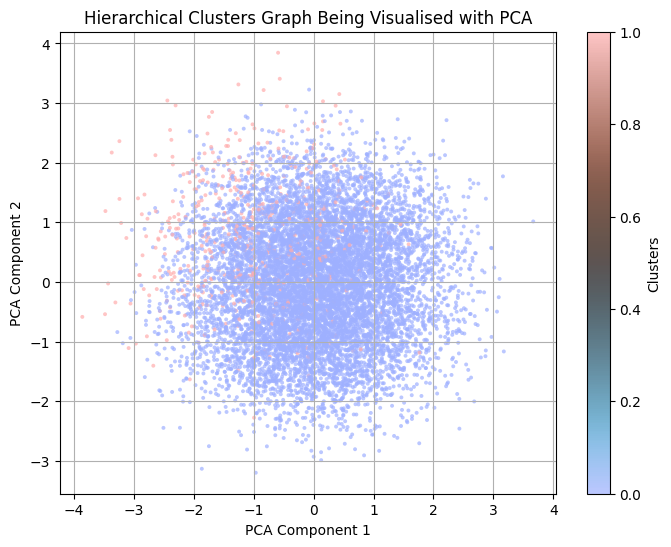

In [ ]:
# Applying Principal Component Analysis (PCA) to decrease it to a two dimension

pca = PCA(n_components = 2)
X_test_2D = pca.fit_transform(X_test_scaled)

# Predicting the clusters with Hierarchical Clustering
cluster_labels1 = hie_model.fit_predict(X_test)

# Plotting the clusters
plt.figure(figsize = (8, 6))
scatter = plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c = cluster_labels1, cmap = 'berlin', s = 8, linewidths = 0, edgecolors = 'none', alpha = 0.7)
plt.title("Hierarchical Clusters Graph Being Visualised with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label = "Clusters")
plt.grid(True)
plt.show()

### Isolation Forest

In [ ]:
fraud_rate = np.mean(y)  # if 1 = fraud and 0 = not fraud
print(f"Fraud rate: {fraud_rate:.2%}")

Fraud rate: 32.13%


In [ ]:
# Training on non fraud samples only i.e normal samples
X_train_normal = X_train_scaled[y_train == 0]

In [ ]:
isoforest_model = IsolationForest(contamination = 0.32, random_state = 42)
isoforest_model.fit(X_train_normal)

# contamination - 0.32 due to the percentage of fraud rate being 32.13%

IsolationForest(contamination=0.32, random_state=42)

In [ ]:
# Hyperparameter grid for Isolation Forest

iso_param_dist = {
    'n_estimators': [50,100],
    'max_samples': ['auto', 0.6],
    'contamination': [0.32],
    'max_features': [0.5,0.8]

}

In [ ]:
# Defining a custom scoring function for unsupervised F1 score
from sklearn.metrics import f1_score
from scipy.stats import mode

def unsupervised_f1_score(estimator, X, y):
    # Predict anomalies (-1) and normal (1)
    y_pred = estimator.predict(X)

    # Map the predictions to binary (1 is anomaly, 0 is normal)
    y_pred_binary = np.where(y_pred == -1, 1, 0)

    # Map predicted cluster labels to true labels using majority vote
    # This is a simplification for evaluation in an unsupervised context where true labels are available for evaluation

    mapped_labels2 = np.zeros_like(y_pred_binary)
    for predicted_label in np.unique(y_pred_binary):
        mask = y_pred_binary == predicted_label
        if np.sum(mask) > 0: # To avoid error if a cluster is empty
            majority_class2 = mode(y[mask], keepdims = True).mode[0]
            mapped_labels2[mask] = majority_class2

    # Calculating the the F1 score
    return f1_score(y, mapped_labels2)

In [ ]:
# Fit Isolation Forest
from sklearn.metrics import make_scorer
search_isoforest = RandomizedSearchCV(
    estimator = IsolationForest (random_state = 42),
    param_distributions = iso_param_dist,
    n_iter = 5,
    scoring = make_scorer (unsupervised_f1_score),
    cv = 3,
    verbose = 1,
)

search_isoforest.fit (X_train_normal)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

RandomizedSearchCV(cv=3, estimator=IsolationForest(random_state=42), n_iter=5,
                   param_distributions={'contamination': [0.32],
                                        'max_features': [0.5, 0.8],
                                        'max_samples': ['auto', 0.6],
                                        'n_estimators': [50, 100]},
                   scoring=make_scorer(unsupervised_f1_score, response_method='predict'),
                   verbose=1)

In [ ]:
print ("Best Parameters: ", search_isoforest.best_params_)
print ("Best Score:", search_isoforest.best_score_)

Best Parameters:  {'n_estimators': 50, 'max_samples': 0.6, 'max_features': 0.8, 'contamination': 0.32}
Best Score: nan


In [ ]:
isoforest_model = IsolationForest(
    n_estimators = 100,
    max_samples = 0.6,
    max_features = 0.8,
    contamination = 0.32,   # adjusted based on the estimated fraud rate
    random_state = 42
)
# Predicting the model
isoforest_model.fit (X_train_normal)
y_pred_isoforest = isoforest_model.predict(X_test_scaled)

# Predicting the anomalies (-1 = anomaly and 1 = normal i.e fraud = 1 and not fraud = 0)
y_pred_binary = np.where(y_pred_isoforest == -1, 1, 0)

# Evaluating the model
print("The Isolation Forest Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary, zero_division = 0))

The Isolation Forest Classification Report:
Accuracy: 0.5717
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      6787
           1       0.36      0.43      0.39      3213

    accuracy                           0.57     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.59      0.57      0.58     10000



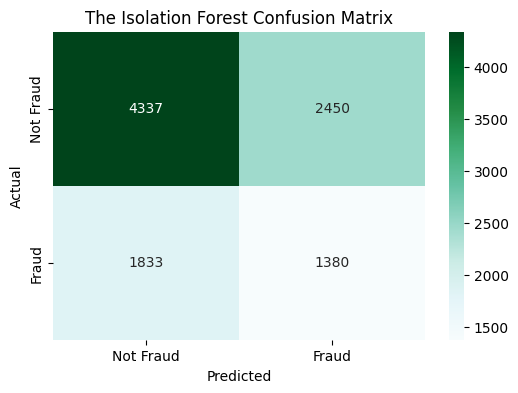

In [ ]:
# Plotting the Iso Forest confusion matrix
y_pred_isoforest = isoforest_model.predict(X_test_scaled)
cm_isoforest = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize = (6,4))
sns.heatmap(cm_isoforest, annot = True, fmt ='d', cmap = 'BuGn', xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'])
plt.title("The Isolation Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Unsupervised Learning Models - Area Under the Curve (AUC) Receiver Operating Characteristic (ROC) Curve

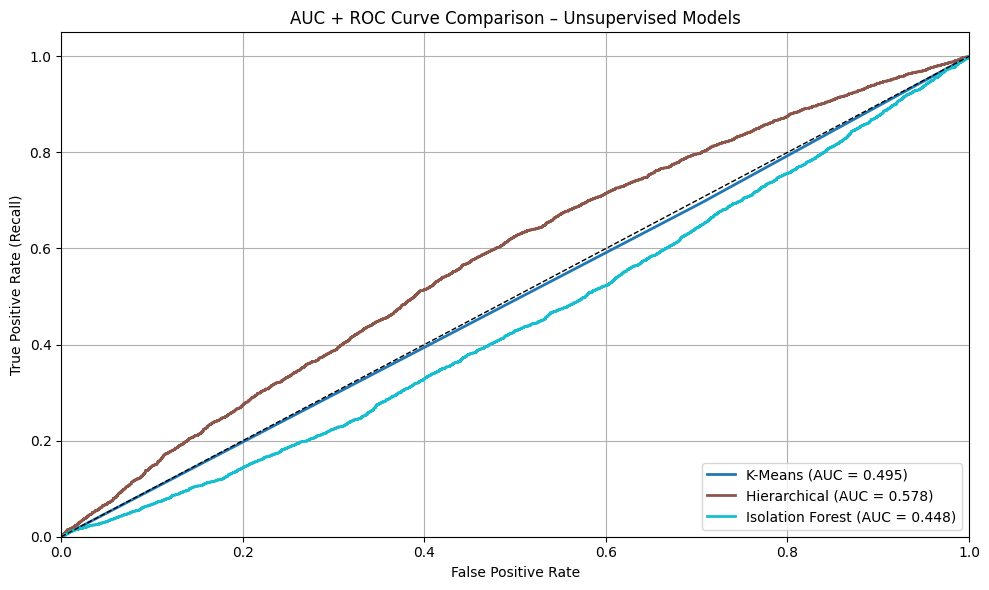

In [ ]:
def to_scores(obj, X = None):
    """Return a 1-D vector of scores/probabilities for the positive class."""
    if isinstance(obj, np.ndarray):
        return obj.ravel()
    if hasattr(obj, "predict_proba"):
        proba = obj.predict_proba(X)
        return proba[:, 1] if proba.ndim == 2 and proba.shape[1] > 1 else proba.ravel()
    if hasattr(obj, "decision_function"):
        return obj.decision_function(X).ravel()
    if hasattr(obj, "predict"):
        return obj.predict(X).ravel() # Added predict method

    # To handle the AgglomerativeClustering i.e Hierarchical Clustering
    if isinstance(obj, AgglomerativeClustering):
        cluster_labels = obj.labels_
        scores = np.zeros(X.shape[0])
        for cluster in np.unique(cluster_labels):
            mask = cluster_labels == cluster
            # Calculate the centroid of the cluster
            centroid = np.mean(X[mask], axis=0)
            # Calculate the distance of each point in the cluster to its centroid
            distances = np.linalg.norm(X[mask] - centroid, axis=1)
            scores[mask] = distances
        return scores
    return obj.ravel()


unsupervised_curve = {
    "K-Means":             to_scores(kmeans_model,      X_test_scaled),
    "Hierarchical":        to_scores(hie_model,         X_test_scaled),
    "Isolation Forest":    to_scores(isoforest_model,   X_test_scaled),
}

# Removing any bad vectors (length mismatch, NaNs)
for name, s in list(unsupervised_curve.items()):
    if len(s) != len(y_test) or np.isnan(s).any():
        print(f"Skipping {name}: bad score vector (len={len(s)}; NaN? {np.isnan(s).any()})")
        unsupervised_curve.pop(name, None)

# Plotting ROC curves
colours = plt.cm.tab10(np.linspace(0, 1, len(unsupervised_curve)))
plt.figure(figsize=(10, 6))

for (name, scores), c in zip(unsupervised_curve.items(), colours):
    # y_test is 1 for anomalies, 0 for normal
    fpr, tpr, _ = roc_curve(y_test, scores, pos_label = 1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", lw = 2, color = c)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("AUC + ROC Curve Comparison – Unsupervised Models")
plt.legend(loc = "lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### Unsupervised Learning Models Comparison - Accuracy and F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Model predictions dictionary
unsupervisedmodels = {
    "K-means Clustering": mapped_labels,
    "Hierarchical Clustering": mapped_labels1,
    "Isolation Forest": y_pred_binary
}


# Collecting the accuracy and F1 score
results = []
for model_name, y_pred in unsupervisedmodels.items():
    if y_pred is None:
        continue
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "F1 Score": f1,
        "Accuracy": accuracy,

    })

# Creating the table
unsupervisedcomparison_table = pd.DataFrame(results)
unsupervisedcomparison_table.sort_values(by = "F1 Score", ascending = False, inplace = True)

# Displaying the table
unsupervisedcomparison_table

,Model,F1 Score,Accuracy
2,Isolation Forest,0.391878,0.5717
0,K-means Clustering,0.316605,0.5765
1,Hierarchical Clustering,0.000000,0.6787


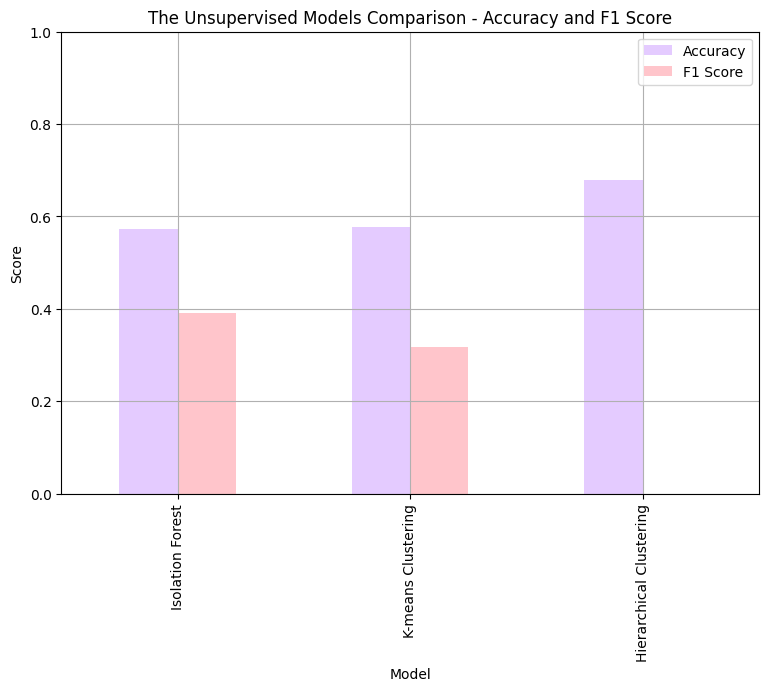

In [ ]:
# Plotting the Accuracy and F1 Score

colors1 = ['#e4cbff', '#ffc5cb']
unsupervisedcomparison_table.set_index('Model')[["Accuracy", "F1 Score"]].plot(kind = 'bar' , figsize = (9,6), color = colors1)
plt.title("The Unsupervised Models Comparison - Accuracy and F1 Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Unsupervised Learning Models Comparison - Specificity and Sensitivity

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Defining the function
def get_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity


# Predicting for each model

unsupervisedmodels = {
    "K-means Clustering": mapped_labels,
    "Hierachical Clustering": mapped_labels1,
    "Isolation Forest": y_pred_binary,

}

# Applying the function to each model and store the results
results = []
for model_name, y_pred in unsupervisedmodels.items():
    sensitivity, specificity = get_sensitivity_specificity(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity,
    })

# Creating a summary DataFrame
import pandas as pd
unsupervised_sens_spec = pd.DataFrame(results)
unsupervised_sens_spec

,Model,Sensitivity (Recall),Specificity
0,K-means Clustering,0.305322,0.704877
1,Hierachical Clustering,0.000000,1.000000
2,Isolation Forest,0.429505,0.639016


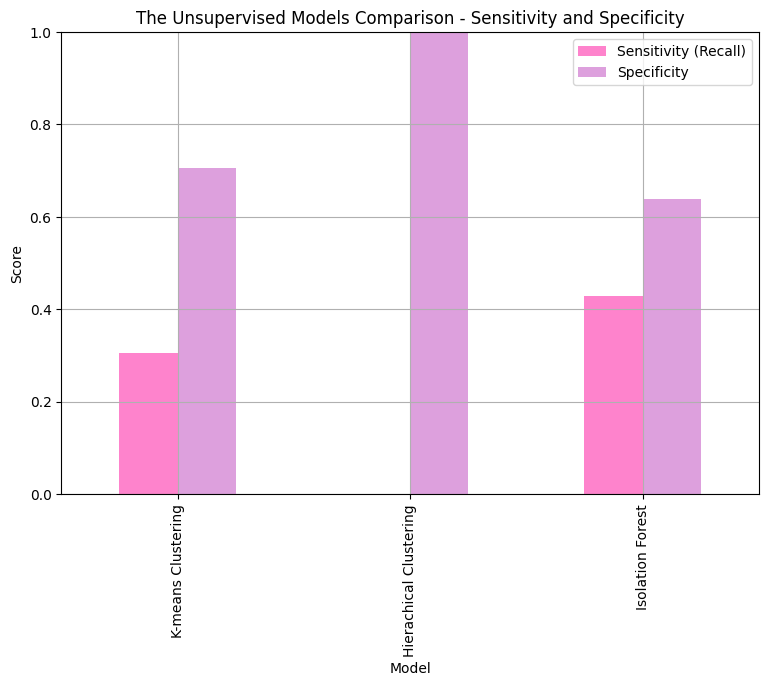

In [ ]:
# Plotting the Sensitivity and Specificity

colors2 = ['#fe83cc', 'plum']
unsupervised_sens_spec.set_index('Model')[["Sensitivity (Recall)", "Specificity"]].plot(kind = 'bar' , figsize = (9,6), color = colors2)
plt.title("The Unsupervised Models Comparison - Sensitivity and Specificity")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Unsupervised Learning Models Comparison - Precision Recall Curve

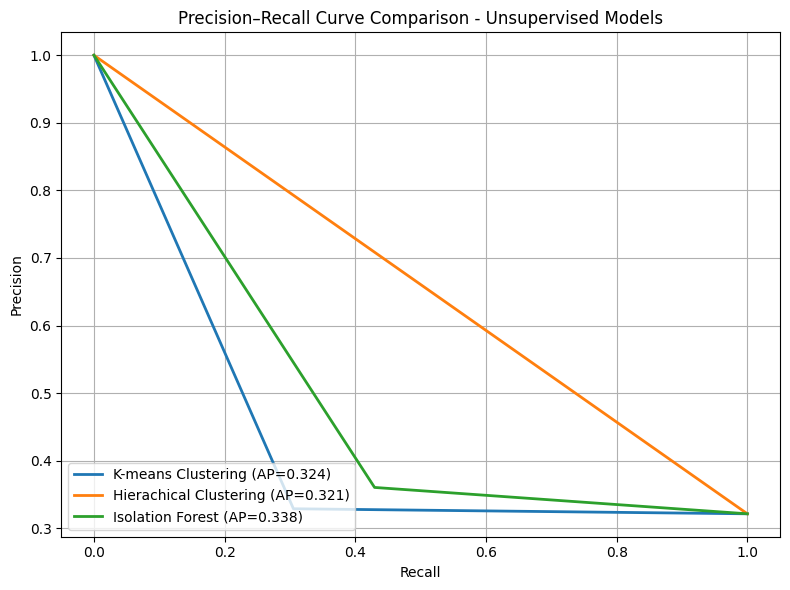

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

preds = {
    "K-means Clustering": mapped_labels,
    "Hierachical Clustering": mapped_labels1,
    "Isolation Forest": y_pred_binary,
}

def as_scores(y_true, p):
    """Return a 1D score vector. If binary labels passed, use them as scores."""
    p = np.asarray(p)
    if p.ndim == 2 and p.shape[1] == 2:   # predict_proba style
        p = p[:, 1]
    p = p.ravel()
    if len(p) != len(y_true):
        raise ValueError(f"len mismatch (y_true={len(y_true)}, preds={len(p)})")
    # if {0,1} labels
    u = np.unique(p[~np.isnan(p)])
    if u.size <= 2 and np.all(np.isin(u, [0, 1])):
        p = p.astype(float)
    return p

fig, ax = plt.subplots(figsize=(8, 6))

curves = []
for name, yhat in preds.items():
    if yhat is None:
        continue
    try:
        scores = as_scores(y_test, yhat)
        precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=1)
        ap = average_precision_score(y_test, scores)
        line, = ax.plot(recall, precision, lw=2, label=f"{name} (AP={ap:.3f})")
        curves.append((ap, line))
    except Exception as e:
        print(f"Skipped {name}: {e}")

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision–Recall Curve Comparison - Unsupervised Models")
ax.grid(True)

# Sorting legend by AP (highest first)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc = "lower left")
plt.tight_layout()
plt.show()

### Ivanise Duarte - SID 2367362